## Homework 1: Part 2
## Implementing regularized linear regression 
In this part, you will implement regularized linear regression and use it to
study models with different bias-variance properties. 

This notebook contains code that helps you get started on 
linear regression with regularization. 
You will need to complete functions in
**reg_linear_regressor.py** and **utils.py**.
Modify this notebook in places marked by **TODO:**.

## Regularized linear regression: an example
In this problem, you will implement regularized linear regression
to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. We will begin by visualizing the dataset containing historical records on the
change in the water level $x$, and the amount of water $y$, flowing out of the dam.
This dataset is divided into three parts:
- A training set that you will use to learn the model:  X,  y.
- A validation set for determining the regularization parameter: Xval, yval.
- A test set for evaluating the performance of your model:  Xtest, ytest. These are unseen examples that were not used during the training of the model.

Run the cell below and it  will plot the training data as shown in Figure 6 in your assignment handout. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading and Visualizing Data ...
(12,)


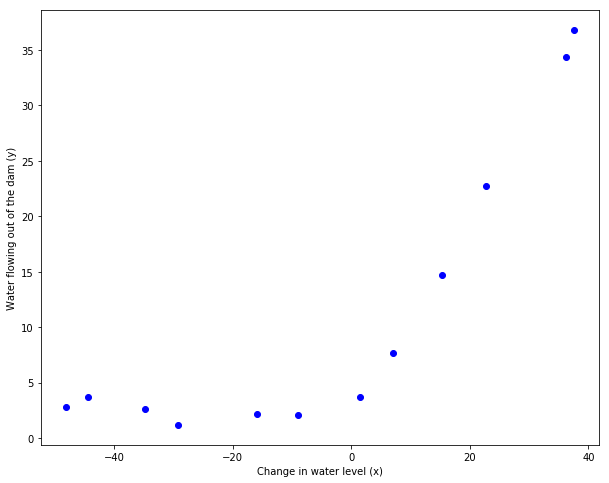

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data

print('Loading and Visualizing Data ...')

X, y, Xtest, ytest, Xval, yval = utils.load_mat('ex2data1.mat')

# Plot training data

plot_utils.plot_data(X,y,'Change in water level (x)','Water flowing out of the dam (y)')
# plt.show()
plt.savefig('fig6.png')
print(X.shape)

## Regularized Linear Regression cost function and gradient (vectorized)
You should now implement the loss function and gradient of the
loss function for regularized linear regression in **reg_linear_regression_multi.py**. Then run the cell below.
Regularized linear regression has the following cost function:
$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right) + \frac{\lambda}{2m}\left( \sum_{j=1}^{n} {\theta_j}^2 \right) $$
where $\lambda$ is a regularization parameter which controls the degree of regularization
(thus, help preventing overfitting). The regularization term puts
a penalty on the overall cost $J(\theta)$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. You should now complete the code for the method loss in the class Reg_LinearRegression_SquaredLoss in the file reg_linear_regressor_multi.py to calculate $J(\theta)$. Vectorize your code and avoid writing for loops.

Correspondingly, the partial derivative of the regularized linear regression  cost function
with respect to  $\theta_j$ is defined as:
\begin{eqnarray*}
\frac{\partial J(\theta)}{\partial \theta_0} & = & \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}){x_j}^{(i)} \\
\frac{\partial J(\theta)}{\partial \theta_j} & = & \left(\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ){x_j}^{(i)}\right) + \frac{\lambda}{m}{\theta_j} \; \; \; \mbox{ for }j \geq 1\\
\end{eqnarray*}
You should now complete the code for the method grad_loss in the class {Reg_LinearRegression_SquaredLoss in the file reg_linear_regressor_multi.py}
to  calculate the gradient, returning
it in the variable grad. 

Then evaluate the cell below. It runs the train method in  reg_linear_regressor_multi.py to compute the optimal value
of $\theta$. This training function uses scipy's fmin_bfgs to optimize the cost function.
Here we have set the regularization parameter $\lambda$ to zero. 

The best fit line plotted by the script  tells us that the model is
not a good fit to the data because the data is non-linear. While
visualizing the best fit as shown is one possible way to debug your learning
algorithm, it is not always easy to visualize the data and model. In the next
cell, you will implement a function to generate learning curves that can
help you debug your learning algorithm even if it is not easy to visualize the
data.

[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]
 [  1.          -8.94145794]
 [  1.          15.30779289]
 [  1.         -34.70626581]
 [  1.           1.38915437]
 [  1.         -44.38375985]
 [  1.           7.01350208]
 [  1.          22.76274892]]
Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Theta at lambda = 0 is [13.08790353  0.36777923]


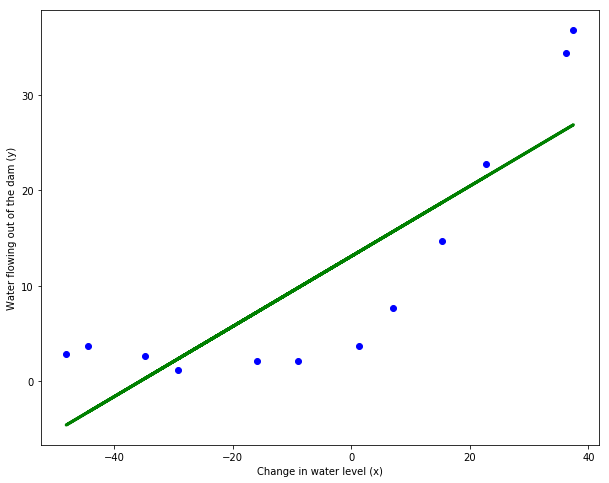

In [8]:
# append a column of ones to matrix X

XX = np.vstack([np.ones((X.shape[0],)),X]).T
print(XX)
#  Train linear regression with lambda = 0

reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,y,reg=0.0,num_iters=1000)
print('Theta at lambda = 0 is %s' % (theta_opt0))

# plot fit over data and show it (or save it in fig7.pdf)
plot_utils.plot_data(X,y,'Change in water level (x)','Water flowing out of the dam (y)')
plt.plot(X,np.dot(XX,theta_opt0),'g-',linewidth=3)
plt.show()
plt.savefig('fig7.png')


## Learning curve for linear regression
An important concept in machine learning is the bias-variance tradeoff. Models
with high bias are not complex enough for the data and tend to underfit,
while models with high variance overfit  the training data.
Here you will plot training and test errors on a
learning curve to diagnose bias-variance problems.

A  learning curve plots
training and cross validation error as a function of training set size. You will complete the
function  learning_curve in utils.py so that it returns a vector of errors for the
training set and  validation set.
To obtain different training set sizes,
use different subsets of the original training set X. Specifically, for
a training set size of $i$, you should use the first $i$ examples.

You can use the train function to find the parameter $\theta$. Note
that the regularization $\lambda$  is passed as a parameter to the learning_curve function.
After learning the $\theta$ parameter, you should compute the error on the training
and validation sets. Recall that the training error for a dataset is
defined as:
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right)  $$


In particular, note that the training error does not include the regularization
term. One way to compute the training error is to use your existing
cost function and set the regularization parameter reg to 0 only when using it to compute the training error
and validation error. When you are computing the training set error,
make sure you compute it on the training subset
instead of the entire training set. However, for the validation error,
you should compute it over the entire validation set. You should store
the computed errors in the vectors error_train and error_val.
When you are finished, the cell below will print the learning curves and produce
a plot similar to Figure 8 in the assignment handout.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 0.005489
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 3.350966
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 2.892100
         Iterations: 3
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 13.178363
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.464360
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 20.114098
         Iterations: 3
         Function eva

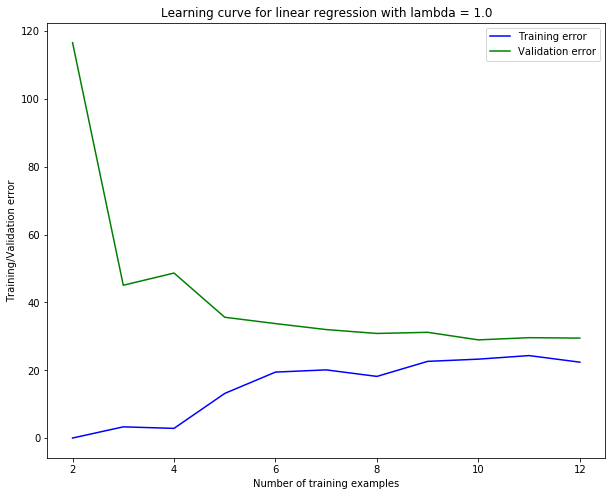

In [15]:
reg = 1.0
XXval = np.vstack([np.ones((Xval.shape[0],)),Xval]).T

# implement the learning_curve function in utils.py
# this script will run your function and show the learning curve

error_train, error_val = utils.learning_curve(XX,y,XXval,yval,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)
plt.show()
plt.savefig('fig8.png')

## Polynomial regression: expanding the basis functions
The problem with our linear model was that it was too simple for the data
and resulted in underfitting (high bias). In this problem, you will address this issue by adding more features. In particular, you will consider hypotheses of the form
$$ h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_p x^p $$
This is still a linear model from the point of view of the parameter space. We have augmented the features with powers of $x$.
Code in the cell below builds these features using sklearn's preprocessing module. 

We use a polynomial of degree 6.
It turns out that if we run the training directly on the projected data,  it will
not work well as the features would be badly scaled (e.g., an example with
$x = 40$ will now have a feature $x^6 = 40^6 = 4.1 \times 10^{9}$). Therefore, you will
need to use feature normalization.
Before learning the parameter $\theta$ for the polynomial regression, the script in the cell below will
first call the **feature_normalize** function you wrote earlier. It will normalize the features of the training set,
storing the mu, sigma parameters separately. It will project the validation and test sets too, but normalize them using the same mu and sigma parameters.

In [4]:
from utils import feature_normalize
import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize
# We will consider a 6th order polynomial fit for the data

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(np.reshape(X,(len(X),1)))
X_poly, mu, sigma = utils.feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(np.reshape(Xtest,(len(Xtest),1)))
X_poly_val = poly.fit_transform(np.reshape(Xval,(len(Xval),1)))

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T

## Learning curves for polynomial regression
The cell below trains a linear model on the transformed data. After learning $\theta$, you should see two plots 
generated for polynomial regression with $\lambda= 0$.

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Theta at lambda = 0 is [ 11.21758977  10.88676468  12.86207254  10.28506173  -4.20098901
 -11.4141408   -4.90366713]


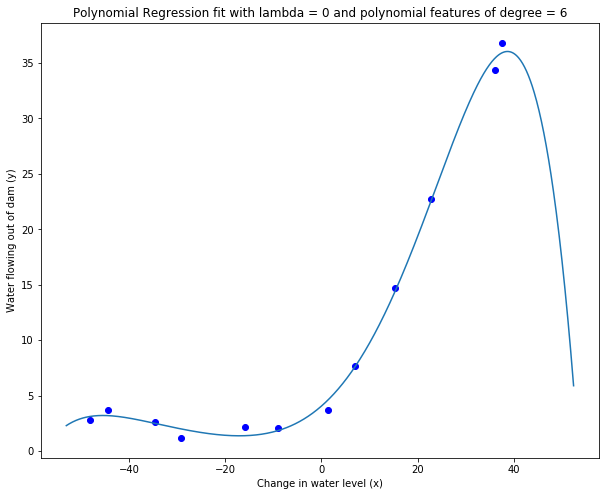

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 37
         

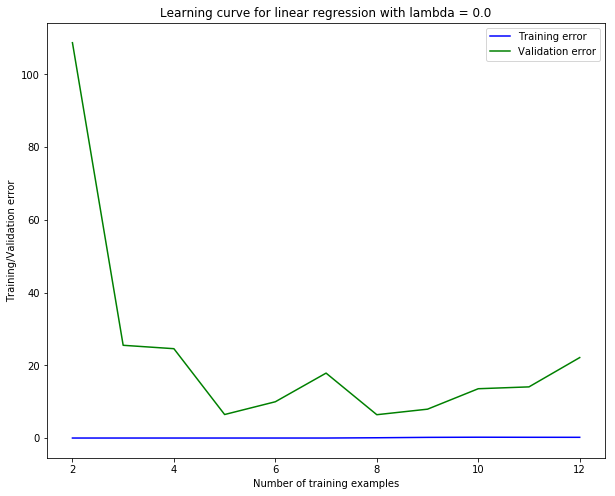

In [20]:
reg = 0.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print('Theta at lambda = 0 is %s' % (theta_opt1))


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.show()
plt.savefig('fig9.png')
# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10.png')

Optimization terminated successfully.
         Current function value: 6.891076
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Theta at lambda = 0 is [11.21758965  8.38063919  5.2189995   3.62613002  2.11031236  1.95477335
  0.7852622 ]


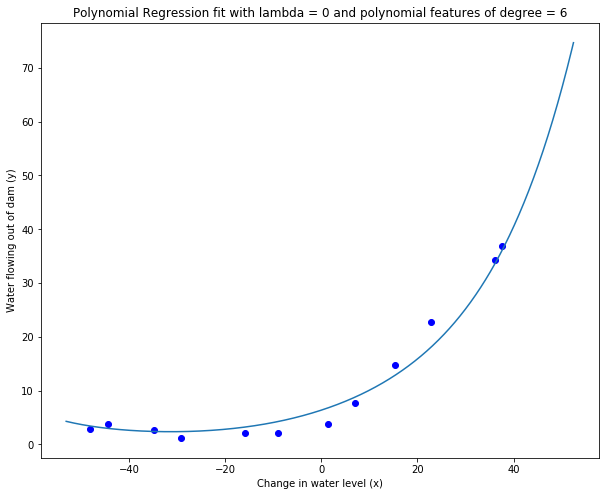

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.070596
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 17.745495
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 14.040584
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 11.237114
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 9.777938
         Iterations: 18
         Function evaluations: 19
  

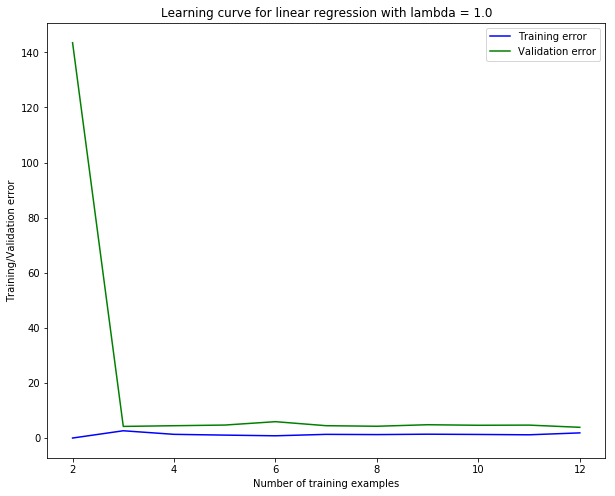

In [21]:
reg = 1.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print('Theta at lambda = 0 is %s' % (theta_opt1))


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.show()
plt.savefig('fig9_lamda1.png')
# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10_lamda1.png')

Optimization terminated successfully.
         Current function value: 32.613222
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Theta at lambda = 0 is [11.21758914  4.46192704  2.41291632  3.02877425  1.45338351  2.00441329
  0.81193983]


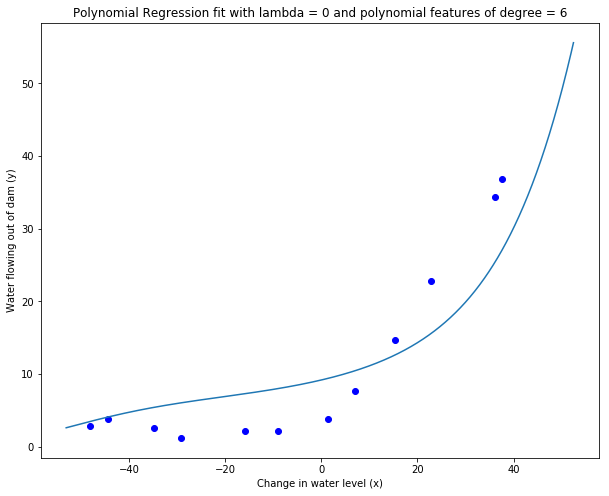

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.108555
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 75.660685
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 74.830449
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 60.966522
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 55.961503
         Iterations: 12
         Function evaluations: 13
   

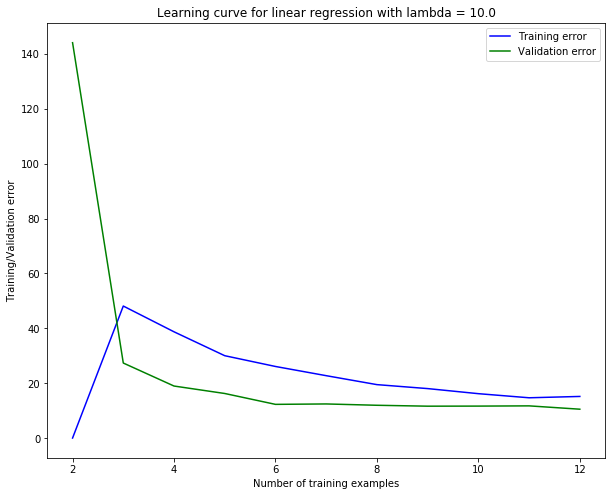

In [22]:
reg = 10.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print('Theta at lambda = 0 is %s' % (theta_opt1))


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.show()
plt.savefig('fig9_lamda10.png')
# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10_lamda10.png')

Optimization terminated successfully.
         Current function value: 66.787978
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Theta at lambda = 0 is [ 1.12175893e+01  1.01732906e+00  3.17218425e-01  7.98987676e-01
  1.26291076e-01  6.03254859e-01 -5.02063756e-03]


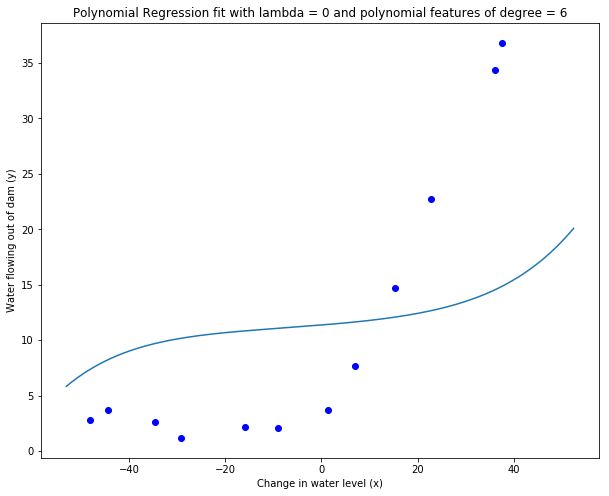

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.114724
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 112.490153
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 132.168613
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 118.185547
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 110.243586
         Iterations: 12
         Function evaluations: 17
 

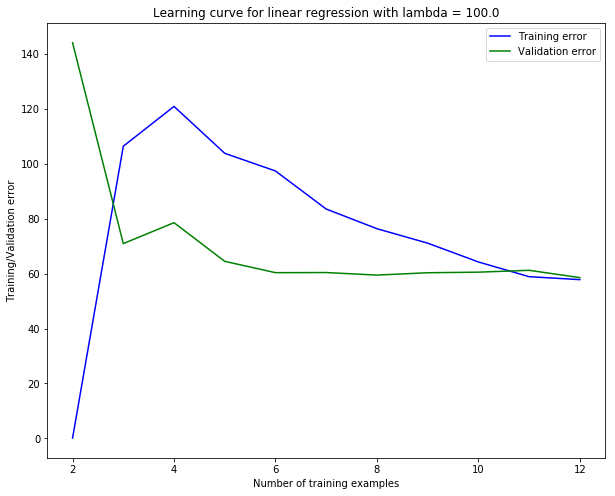

In [23]:
reg = 100.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print('Theta at lambda = 0 is %s' % (theta_opt1))


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.show()
plt.savefig('fig9_lamda100.png')
# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10_lamda100.png')

Optimization terminated successfully.
         Current function value: 4.198709
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Theta at lambda = 0 is [11.21758897  9.48658501  6.20862115  3.07297277  1.652897    1.34739944
  0.07920519]


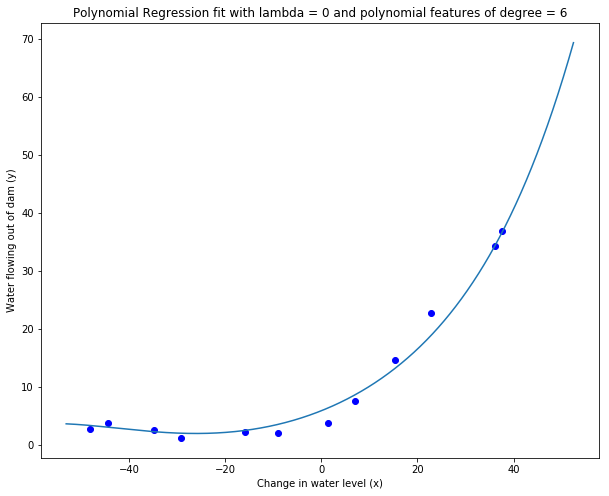

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.050842
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 9.601559
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 7.386669
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 5.911490
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 5.121795
         Iterations: 20
         Function evaluations: 21
  

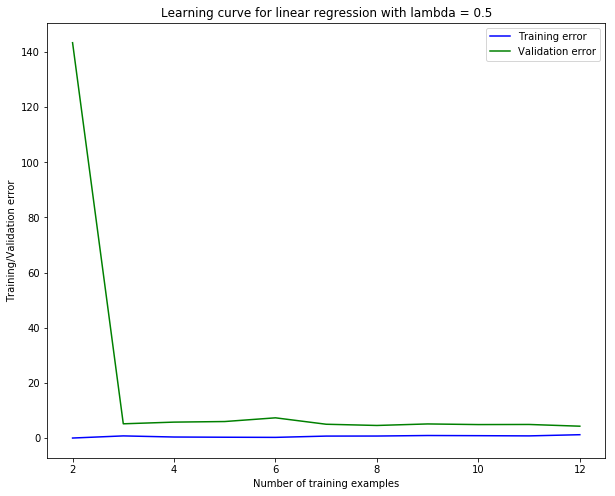

In [24]:
reg = 0.5
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print('Theta at lambda = 0 is %s' % (theta_opt1))


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.show()
plt.savefig('fig9_lamda05.png')
# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10_lamda05.png')

Optimization terminated successfully.
         Current function value: 7.863916
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Theta at lambda = 0 is [11.21758933  8.09355286  4.98776091  3.7272861   2.17849795  2.07034856
  0.91765212]


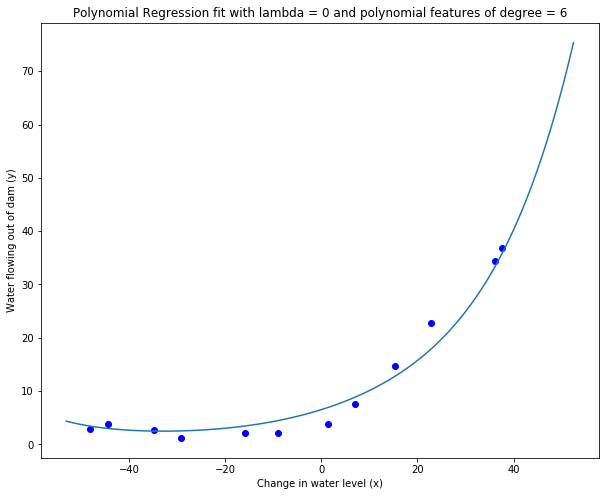

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.075484
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 20.671096
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 16.523773
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 13.225696
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 11.532721
         Iterations: 17
         Function evaluations: 18


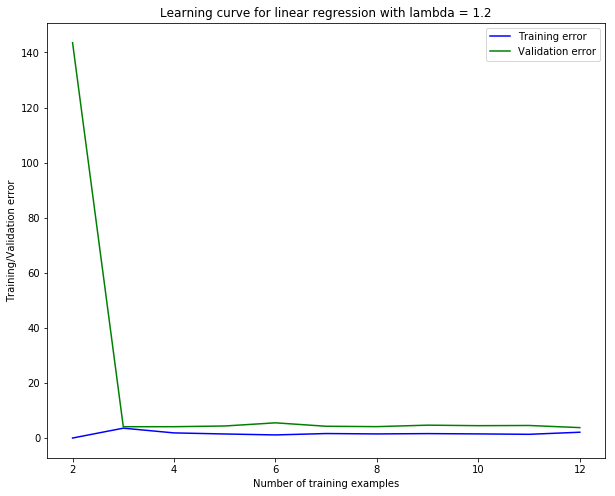

In [25]:
reg = 1.2
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print('Theta at lambda = 0 is %s' % (theta_opt1))


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.show()
plt.savefig('fig9_lamda1.2.png')
# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10_lamda1.2.png')

## Adjusting the regularization parameter
You will now explore how the regularization parameter
affects the bias-variance of regularized polynomial regression. You should
now modify the  lambda parameter in the cell above and try $\lambda = 1, 10, 100$. For
each of these values, the script will generate a polynomial fit to the data
and also a learning curve. Submit two plots for each value of lambda: the fit as well as the learning curve. Comment on the impact of the choice of lambda on the quality of the learned model in your **writeup.pdf**. 

## Calculating test error on the best model
To get a better indication of a model's performance in the real
world, it is important to evaluate the final model on a test set that was
not used in any part of training (that is, it was neither used to select the regularization parameter, nor to learn the model parameters).
Calculate the error of the best model that you found with the previous analysis
and report it.

In [5]:
# TODO: your code for computing test error on the best model (model with the best lambda)
reglinear_reg3 = RegularizedLinearReg_SquaredLoss()
best_lamda = 1
theta_opt = reglinear_reg3.train(Xtest,ytest,reg=best_lamda,num_iters=10000)
test_error = reglinear_reg3.loss(theta_opt,XX_polytest,ytest,best_lamda)
print(_error)



ValueError: not enough values to unpack (expected 2, got 1)

## Selecting $\lambda$ using a validation set
You will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the 
validation set, we can then evaluate the model on the test set to estimate
how well the model will perform on actual unseen data.
**Complete the function validation_curve.m in utils.py**. Specifically,
you should should use the train method on an instance of the class Reg_Linear_Regressor to train the model using
different values of $\lambda$ and to compute the training error and  validation error.
You should try $\lambda$ in the following range: \{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}.

After you have completed the code, run the cell below to plot a validation curve of $\lambda$ versus the error. This plot  allows you select
which $\lambda$ value to use. Due to randomness
in the training and validation splits of the dataset, the cross validation error
can sometimes be lower than the training error. Submit a pdf version of this plot in **writeup.pdf**. Comment on the best choice of $\lambda$ for this problem.

(12, 7)
(21, 7)
Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.200379
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.204950
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.220253
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.260109
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.378278
         Iterations: 41
         Function ev

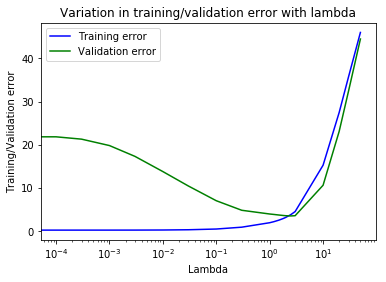

In [6]:
# now implement the validation_curve function in utils.py
# this function helps in determining the best lambda using a
# a validation set
# The code will now run your function and plot the figure 
print(XX_poly.shape)
print(XX_poly_val.shape)
reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()


Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.220253
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.260109
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.378278
         Iterations: 41
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 0.647252
         Iterations: 37
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 1.372851
         Iterations: 34
         Function evaluations: 35
  

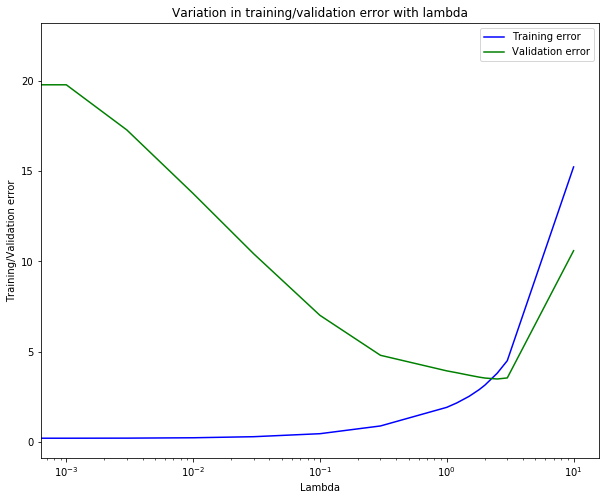

In [34]:
reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()


## Plotting learning curves with randomly selected examples 
In practice, especially for small training sets, when you plot learning curves
to debug your algorithms, it is often helpful to average across multiple sets
of randomly selected examples to determine the training error and 
validation error.
Concretely, to determine the training error and cross validation error for
$i$ examples, you should first randomly select $i$ examples from the training set
and $i$ examples from the  validation set. You will then learn the model parameters using the randomly chosen training set and evaluate the parameters on the randomly chosen training set and validation set. The above
steps should then be repeated multiple times (say 50) and the averaged error
should be used to determine the training error and cross validation error for
$i$ examples.
Implement the above
strategy for computing the learning curves. Complete the  function
**learning_curve_averaged** in  **utils.py** to generate compute and generate this plot. Then evaluate the cell below.

C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:155: RuntimeWarning: invalid value encountered in true_divide
  grad = np.dot(error.T, X).T / X.shape[0]
C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:156: RuntimeWarning: divide by zero encountered in true_divide
  grad[1:]+=reg*theta[1:]/X.shape[0]
C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:137: RuntimeWarning: divide by zero encountered in double_scalars
  J = 0.5*((error**2).sum()+reg*(theta[1:]**2).sum())/X.shape[0]
C:\Users\alexumbrala\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\alexumbrala\Downloads\comp540\SML\hw1\part2\reg_linear_regressor_multi.py:137: RuntimeWarning: invalid value encountered in double_scalars
  J = 0.5*((error**2).sum()+reg*(theta[1:]**2).sum())/X.shape[0]


Optimization terminated successfully.
         Current function value: inf
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: inf
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: inf
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: inf
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: inf
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: inf
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization ter

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradi

Optimization terminated successfully.
         Current function value: 1.873053
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 17.854089
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.007103
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.266310
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 8.689414
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 5.881479
         Iterations: 11
         Function evaluations: 12
 

Optimization terminated successfully.
         Current function value: 12.644860
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.934231
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 5.088218
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.044334
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 17.653845
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 13.639284
         Iterations: 16
         Function evaluations: 1

Optimization terminated successfully.
         Current function value: 12.994488
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 6.667137
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 15.479578
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 12.476300
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 15.212304
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 11.690940
         Iterations: 16
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 11.820867
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 10.787785
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 11.586795
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 9.763052
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 9.416361
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 12.251339
         Iterations: 17
         Function evaluations: 1

Optimization terminated successfully.
         Current function value: 8.931390
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 11.271679
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 9.191770
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 8.361439
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 8.283347
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 8.443137
         Iterations: 16
         Function evaluations: 17
 

Optimization terminated successfully.
         Current function value: 10.031655
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 8.635642
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 7.973105
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 9.629615
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 9.038963
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 9.062083
         Iterations: 19
         Function evaluations: 20
 

Optimization terminated successfully.
         Current function value: 8.693830
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 7.597554
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 7.091677
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 8.759627
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 7.441611
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 6.871257
         Iterations: 19
         Function evaluations: 20
  

Optimization terminated successfully.
         Current function value: 6.243699
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 6.748675
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 7.286548
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 7.117851
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 6.653821
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 8.745448
         Iterations: 19
         Function evaluations: 20
  

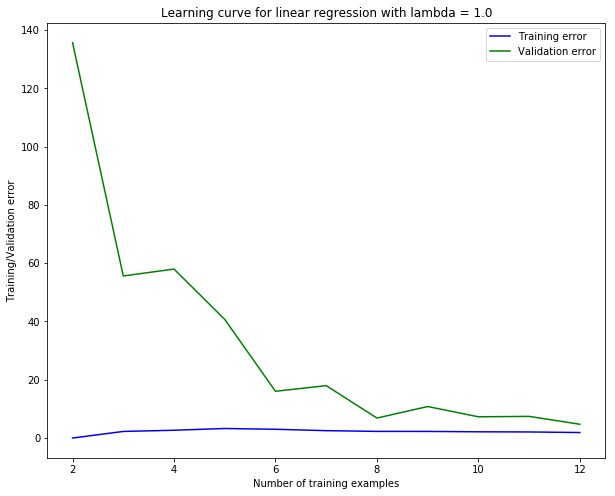

In [9]:
# now implement the averaged learning curve function in utils.py
# The script runs your function, plots the curves and saves it in fig11.pdf

reg = 1.0
error_train,error_val = utils.averaged_learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.show()
plt.savefig('fig10.png')

## Extra Credit: Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

In [71]:
### TODO: your Boston code here or in a separate notebook.
from sklearn.datasets import load_boston
import pandas as pd
df = pd.DataFrame(data = load_boston().data, columns = load_boston().feature_names)
df




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
